In [ ]:
!pip install pandas
import os
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import regularizers
from tensorflow.keras.optimizers import Adam

In [ ]:
!wget https://uofi.box.com/shared/static/4bjhkchbo2chssjovpl97jduvcpy29v8.csv

--2022-04-13 04:58:03--  https://uofi.box.com/shared/static/4bjhkchbo2chssjovpl97jduvcpy29v8.csv
Resolving uofi.box.com (uofi.box.com)... 107.152.24.197
Connecting to uofi.box.com (uofi.box.com)|107.152.24.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/4bjhkchbo2chssjovpl97jduvcpy29v8.csv [following]
--2022-04-13 04:58:03--  https://uofi.box.com/public/static/4bjhkchbo2chssjovpl97jduvcpy29v8.csv
Reusing existing connection to uofi.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://uofi.app.box.com/public/static/4bjhkchbo2chssjovpl97jduvcpy29v8.csv [following]
--2022-04-13 04:58:03--  https://uofi.app.box.com/public/static/4bjhkchbo2chssjovpl97jduvcpy29v8.csv
Resolving uofi.app.box.com (uofi.app.box.com)... 107.152.24.201
Connecting to uofi.app.box.com (uofi.app.box.com)|107.152.24.201|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcl

In [ ]:
file = "4bjhkchbo2chssjovpl97jduvcpy29v8.csv"

In [ ]:
df = pd.read_csv(file)

In [ ]:
df.head()

,Unnamed: 0,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,...,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate
0,0,Alabama,US,2022-01-28 04:31:25,32.3182,-86.9023,1153149,16826,NaN,NaN,...,23518.366123,6901698.0,NaN,1.459135,84000001.0,USA,140759.485926,NaN,NaN,NaN
1,1,Alaska,US,2022-01-28 04:31:25,61.3707,-152.4044,206504,1081,NaN,NaN,...,28228.475350,3741734.0,NaN,0.523477,84000002.0,USA,511483.777485,NaN,NaN,NaN
2,2,American Samoa,US,2022-01-28 04:31:25,-14.2710,-170.1320,18,0,NaN,NaN,...,32.350245,2140.0,NaN,0.000000,16.0,ASM,3846.084722,NaN,NaN,NaN
3,3,Arizona,US,2022-01-28 04:31:25,33.7298,-111.4312,1813796,25932,NaN,NaN,...,24919.171882,17176458.0,NaN,1.429709,84000004.0,USA,235981.945719,NaN,NaN,NaN
4,4,Arkansas,US,2022-01-28 04:31:25,34.9697,-92.3731,762401,9596,NaN,NaN,...,25263.436592,4780951.0,NaN,1.258655,84000005.0,USA,158424.834747,NaN,NaN,NaN


As we take a look, it contains a lot of "NaN" values.

# Inspecing and cleaning data

1.) 
- covert last update to datetime

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41372 entries, 0 to 41371
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            41372 non-null  int64  
 1   Province_State        41372 non-null  object 
 2   Country_Region        41372 non-null  object 
 3   Last_Update           41353 non-null  object 
 4   Lat                   39928 non-null  float64
 5   Long_                 39928 non-null  float64
 6   Confirmed             41372 non-null  int64  
 7   Deaths                41372 non-null  int64  
 8   Recovered             15122 non-null  float64
 9   Active                15122 non-null  float64
 10  FIPS                  41353 non-null  float64
 11  Incident_Rate         39928 non-null  float64
 12  Total_Test_Results    27966 non-null  float64
 13  People_Hospitalized   5129 non-null   float64
 14  Case_Fatality_Ratio   28785 non-null  float64
 15  UID                

In [ ]:
df['Last_Update'] = df['Last_Update'].astype('datetime64[ns]')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41372 entries, 0 to 41371
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            41372 non-null  int64         
 1   Province_State        41372 non-null  object        
 2   Country_Region        41372 non-null  object        
 3   Last_Update           41353 non-null  datetime64[ns]
 4   Lat                   39928 non-null  float64       
 5   Long_                 39928 non-null  float64       
 6   Confirmed             41372 non-null  int64         
 7   Deaths                41372 non-null  int64         
 8   Recovered             15122 non-null  float64       
 9   Active                15122 non-null  float64       
 10  FIPS                  41353 non-null  float64       
 11  Incident_Rate         39928 non-null  float64       
 12  Total_Test_Results    27966 non-null  float64       
 13  People_Hospitali

- sort value by 
first >> Province_state
second >> Last_Update

In [ ]:
df.sort_values(by=['Province_State','Last_Update'], inplace=True)

In [ ]:
df

,Unnamed: 0,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,...,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate
18913,18913,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3667,93,NaN,NaN,...,74.788122,NaN,437.0,NaN,84000001.0,USA,1265.075660,12.264945,62029.0,2.536133
23035,23035,Alabama,US,2020-04-13 23:07:54,32.3182,-86.9023,3870,99,NaN,NaN,...,78.928288,NaN,457.0,NaN,84000001.0,USA,1318.245181,12.238886,64636.0,2.558140
19901,19901,Alabama,US,2020-04-14 23:33:31,32.3182,-86.9023,4041,114,NaN,NaN,...,82.415817,NaN,493.0,NaN,84000001.0,USA,1377.818704,12.471541,67557.0,2.821084
36904,36904,Alabama,US,2020-04-15 22:56:51,32.3182,-86.9023,4307,118,NaN,NaN,...,87.840863,NaN,525.0,NaN,84000001.0,USA,1444.428468,12.883436,70823.0,2.739726
27038,27038,Alabama,US,2020-04-16 23:30:51,32.3182,-86.9023,4465,133,NaN,NaN,...,91.063258,NaN,553.0,NaN,84000001.0,USA,1506.734908,12.727273,73878.0,2.978723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25065,25065,Wyoming,US,2022-03-22 04:31:02,42.7560,-107.3025,155907,1769,NaN,NaN,...,26938.155605,1383108.0,NaN,1.134651,84000056.0,USA,238978.227552,NaN,NaN,NaN
8817,8817,Wyoming,US,2022-03-23 04:31:22,42.7560,-107.3025,155988,1783,NaN,NaN,...,26952.151068,1383108.0,NaN,1.143037,84000056.0,USA,238978.227552,NaN,NaN,NaN
16476,16476,Wyoming,US,2022-03-24 04:31:09,42.7560,-107.3025,155988,1783,NaN,NaN,...,26952.151068,1385758.0,NaN,1.143037,84000056.0,USA,239436.103801,NaN,NaN,NaN
22163,22163,Wyoming,US,2022-03-25 04:31:26,42.7560,-107.3025,155988,1783,NaN,NaN,...,26952.151068,1385758.0,NaN,1.143037,84000056.0,USA,239436.103801,NaN,NaN,NaN


In [ ]:
df["Province_State"].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Recovered',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [ ]:
len(df["Province_State"].unique())

59

# 2- Remove the rows where the Province_State is “Recovered”, “American_Samoa”, “Diamond Princess” , “Grand Princess”, “Virgin Islands”, and “Northern Mariana Islands”

In [ ]:
unwanted_list =  ['Recovered','American Samoa','Diamond Princess','Grand Princess','Virgin Islands', 'Northern Mariana Islands']
for i in unwanted_list:

  df = df.loc[df["Province_State"] != i ]
df

,Unnamed: 0,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,...,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate
18913,18913,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3667,93,NaN,NaN,...,74.788122,NaN,437.0,NaN,84000001.0,USA,1265.075660,12.264945,62029.0,2.536133
23035,23035,Alabama,US,2020-04-13 23:07:54,32.3182,-86.9023,3870,99,NaN,NaN,...,78.928288,NaN,457.0,NaN,84000001.0,USA,1318.245181,12.238886,64636.0,2.558140
19901,19901,Alabama,US,2020-04-14 23:33:31,32.3182,-86.9023,4041,114,NaN,NaN,...,82.415817,NaN,493.0,NaN,84000001.0,USA,1377.818704,12.471541,67557.0,2.821084
36904,36904,Alabama,US,2020-04-15 22:56:51,32.3182,-86.9023,4307,118,NaN,NaN,...,87.840863,NaN,525.0,NaN,84000001.0,USA,1444.428468,12.883436,70823.0,2.739726
27038,27038,Alabama,US,2020-04-16 23:30:51,32.3182,-86.9023,4465,133,NaN,NaN,...,91.063258,NaN,553.0,NaN,84000001.0,USA,1506.734908,12.727273,73878.0,2.978723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25065,25065,Wyoming,US,2022-03-22 04:31:02,42.7560,-107.3025,155907,1769,NaN,NaN,...,26938.155605,1383108.0,NaN,1.134651,84000056.0,USA,238978.227552,NaN,NaN,NaN
8817,8817,Wyoming,US,2022-03-23 04:31:22,42.7560,-107.3025,155988,1783,NaN,NaN,...,26952.151068,1383108.0,NaN,1.143037,84000056.0,USA,238978.227552,NaN,NaN,NaN
16476,16476,Wyoming,US,2022-03-24 04:31:09,42.7560,-107.3025,155988,1783,NaN,NaN,...,26952.151068,1385758.0,NaN,1.143037,84000056.0,USA,239436.103801,NaN,NaN,NaN
22163,22163,Wyoming,US,2022-03-25 04:31:26,42.7560,-107.3025,155988,1783,NaN,NaN,...,26952.151068,1385758.0,NaN,1.143037,84000056.0,USA,239436.103801,NaN,NaN,NaN


Check remaining state after droping

In [ ]:
df["Province_State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [ ]:
len(df["Province_State"].unique())

53

I have successfully removed rows we needed.

# 3- Count and print the number of rows for each remaining Province_State. All states should have 713 entries.

In [ ]:
def count_row_of_state(state_name):
  print(state_name, " has ",+ len(df.loc[df["Province_State"] == state_name ]), " rows.")


In [ ]:
for i in df["Province_State"].unique():
  count_row_of_state(i)

Alabama  has  713  rows.
Alaska  has  713  rows.
Arizona  has  713  rows.
Arkansas  has  713  rows.
California  has  713  rows.
Colorado  has  713  rows.
Connecticut  has  713  rows.
Delaware  has  713  rows.
District of Columbia  has  713  rows.
Florida  has  713  rows.
Georgia  has  713  rows.
Guam  has  713  rows.
Hawaii  has  713  rows.
Idaho  has  713  rows.
Illinois  has  713  rows.
Indiana  has  713  rows.
Iowa  has  713  rows.
Kansas  has  713  rows.
Kentucky  has  713  rows.
Louisiana  has  713  rows.
Maine  has  713  rows.
Maryland  has  713  rows.
Massachusetts  has  713  rows.
Michigan  has  713  rows.
Minnesota  has  713  rows.
Mississippi  has  713  rows.
Missouri  has  713  rows.
Montana  has  713  rows.
Nebraska  has  713  rows.
Nevada  has  713  rows.
New Hampshire  has  713  rows.
New Jersey  has  713  rows.
New Mexico  has  713  rows.
New York  has  713  rows.
North Carolina  has  713  rows.
North Dakota  has  713  rows.
Ohio  has  713  rows.
Oklahoma  has  713  rows

# 4- Drop all columns except the following ( the rest of the columns are either redundant or have too many missing values).
**“Last_Update”, “Incident_Rate”, “Confirmed”, ”Deaths”, “Province_state”**

In [ ]:
wanted_col = ['Last_Update', 'Incident_Rate', 'Confirmed', 'Deaths', 'Province_State']

In [ ]:
all_col = [val for val in df.columns]
all_col

['Unnamed: 0',
 'Province_State',
 'Country_Region',
 'Last_Update',
 'Lat',
 'Long_',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'FIPS',
 'Incident_Rate',
 'Total_Test_Results',
 'People_Hospitalized',
 'Case_Fatality_Ratio',
 'UID',
 'ISO3',
 'Testing_Rate',
 'Hospitalization_Rate',
 'People_Tested',
 'Mortality_Rate']

**create the list of columns neeeded to be dropped.**

In [ ]:
to_drop_col = [x for x in all_col if x not in wanted_col]
to_drop_col

['Unnamed: 0',
 'Country_Region',
 'Lat',
 'Long_',
 'Recovered',
 'Active',
 'FIPS',
 'Total_Test_Results',
 'People_Hospitalized',
 'Case_Fatality_Ratio',
 'UID',
 'ISO3',
 'Testing_Rate',
 'Hospitalization_Rate',
 'People_Tested',
 'Mortality_Rate']

In [ ]:
df = df.drop(to_drop_col, axis = 1)
df

,Province_State,Last_Update,Confirmed,Deaths,Incident_Rate
18913,Alabama,2020-04-12 23:18:15,3667,93,74.788122
23035,Alabama,2020-04-13 23:07:54,3870,99,78.928288
19901,Alabama,2020-04-14 23:33:31,4041,114,82.415817
36904,Alabama,2020-04-15 22:56:51,4307,118,87.840863
27038,Alabama,2020-04-16 23:30:51,4465,133,91.063258
...,...,...,...,...,...
25065,Wyoming,2022-03-22 04:31:02,155907,1769,26938.155605
8817,Wyoming,2022-03-23 04:31:22,155988,1783,26952.151068
16476,Wyoming,2022-03-24 04:31:09,155988,1783,26952.151068
22163,Wyoming,2022-03-25 04:31:26,155988,1783,26952.151068


# 5- Is there any missing values in the remaining columns? 
If so, replace them using commonsense or Use fillna function to fill the missing values with zero.

***checking by isnull() in overall columns***

In [ ]:
df[df.columns].isnull().sum()

Province_State    0
Last_Update       0
Confirmed         0
Deaths            0
Incident_Rate     0
dtype: int64

In [ ]:
df.columns.values.tolist()

['Province_State', 'Last_Update', 'Confirmed', 'Deaths', 'Incident_Rate']

***Let's check in more detials***

In [ ]:
df

,Province_State,Last_Update,Confirmed,Deaths,Incident_Rate
18913,Alabama,2020-04-12 23:18:15,3667,93,74.788122
23035,Alabama,2020-04-13 23:07:54,3870,99,78.928288
19901,Alabama,2020-04-14 23:33:31,4041,114,82.415817
36904,Alabama,2020-04-15 22:56:51,4307,118,87.840863
27038,Alabama,2020-04-16 23:30:51,4465,133,91.063258
...,...,...,...,...,...
25065,Wyoming,2022-03-22 04:31:02,155907,1769,26938.155605
8817,Wyoming,2022-03-23 04:31:22,155988,1783,26952.151068
16476,Wyoming,2022-03-24 04:31:09,155988,1783,26952.151068
22163,Wyoming,2022-03-25 04:31:26,155988,1783,26952.151068


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df[df.columns].isnull().values.any()

False

In [ ]:
for i in df.columns.values.tolist():
  print("Column ",i, " has ", df[i].isnull().sum(), "missing values.")

Column  Province_State  has  0 missing values.
Column  Last_Update  has  0 missing values.
Column  Confirmed  has  0 missing values.
Column  Deaths  has  0 missing values.
Column  Incident_Rate  has  0 missing values.


There are no missing values so far.

# 6- The “Last_Update” column is useful but not in the string format. 
Replace this column with four other columns:
 “year”,“month”, “day of the week” and “day of the month” using
pandas.series.dt.year, pandas.series.dt.month, pandas.series.dt.dayofweek and 
pandas.series.dt.day

In [ ]:
df['year'] = df['Last_Update'].dt.year
df['month'] = df['Last_Update'].dt.month
df['date_of_the_week'] = df['Last_Update'].dt.dayofweek
df['date_of_the_month'] = df['Last_Update'].dt.day
df = df.drop(["Last_Update"], axis = 1)
df

,Province_State,Confirmed,Deaths,Incident_Rate,year,month,date_of_the_week,date_of_the_month
18913,Alabama,3667,93,74.788122,2020,4,6,12
23035,Alabama,3870,99,78.928288,2020,4,0,13
19901,Alabama,4041,114,82.415817,2020,4,1,14
36904,Alabama,4307,118,87.840863,2020,4,2,15
27038,Alabama,4465,133,91.063258,2020,4,3,16
...,...,...,...,...,...,...,...,...
25065,Wyoming,155907,1769,26938.155605,2022,3,1,22
8817,Wyoming,155988,1783,26952.151068,2022,3,2,23
16476,Wyoming,155988,1783,26952.151068,2022,3,3,24
22163,Wyoming,155988,1783,26952.151068,2022,3,4,25


# Prepare time series for each Province_state (6pt)

In [ ]:
def convert_aggregated_to_MA(ds, window = 7):
  ds = ds.diff()
  for i in range(0, len(ds)):
    if ((ds.iloc[i] < 0)):
      if (ds.iloc[i-1]<0):
        ds.iloc[i] = ds.iloc[i-1]
      else :
        ds.iloc[i] =0

  return ds.rolling(window).mean()
  return ds

***Create dictionary to contain data frame of each state***

**key** = name of state

**value** = data frame of particular state

In [ ]:
#separate state, but still contain the old value of data frame
d = {}
for state in df.Province_State.unique():
    d[state] = pd.DataFrame()
    d[state]=  df.loc[df.Province_State == state]
d

{'Alabama':       Province_State  Confirmed  Deaths  Incident_Rate  year  month  \
 18913        Alabama       3667      93      74.788122  2020      4   
 23035        Alabama       3870      99      78.928288  2020      4   
 19901        Alabama       4041     114      82.415817  2020      4   
 36904        Alabama       4307     118      87.840863  2020      4   
 27038        Alabama       4465     133      91.063258  2020      4   
 ...              ...        ...     ...            ...   ...    ...   
 25008        Alabama    1291561   19093   26341.265932  2022      3   
 8760         Alabama    1291761   19139   26345.344914  2022      3   
 16419        Alabama    1291946   19169   26349.117971  2022      3   
 22106        Alabama    1292344   19173   26357.235144  2022      3   
 22571        Alabama    1292508   19210   26360.579909  2022      3   
 
        date_of_the_week  date_of_the_month  
 18913                 6                 12  
 23035                 0       

- Convert aggregated values to spread time out as daily count for Deaths and Confirmed
- drop NaN values
- drop column Deaths, and Confirmed as we create a new column Avg_Death, Avg_Confirmed
*italicized text*

In [ ]:
for state in df.Province_State.unique():
    d[state]["Avg_Death"] = convert_aggregated_to_MA(d[state]["Deaths"])
    d[state]["Avg_Confirmed"] = convert_aggregated_to_MA(d[state]["Confirmed"])
    d[state] = d[state].dropna()
    d[state] = d[state].drop(["Deaths", "Confirmed", "Province_State"], axis = 1)
d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


{'Alabama':        Incident_Rate  year  month  date_of_the_week  date_of_the_month  \
 33710     101.525845  2020      4                 6                 19   
 34117     105.298903  2020      4                 0                 20   
 2436      110.214075  2020      4                 1                 21   
 39109     116.087808  2020      4                 2                 22   
 14445     120.309554  2020      4                 4                 24   
 ...              ...   ...    ...               ...                ...   
 25008   26341.265932  2022      3                 1                 22   
 8760    26345.344914  2022      3                 2                 23   
 16419   26349.117971  2022      3                 3                 24   
 22106   26357.235144  2022      3                 4                 25   
 22571   26360.579909  2022      3                 5                 26   
 
        Avg_Death  Avg_Confirmed  
 33710   9.142857     187.285714  
 34117   9.142857

**Example data frame of some states**

In [ ]:
d["Alabama"]

,Incident_Rate,year,month,date_of_the_week,date_of_the_month,Avg_Death,Avg_Confirmed
33710,101.525845,2020,4,6,19,9.142857,187.285714
34117,105.298903,2020,4,0,20,9.142857,184.714286
2436,110.214075,2020,4,1,21,9.857143,194.714286
39109,116.087808,2020,4,2,22,11.142857,197.857143
14445,120.309554,2020,4,4,24,9.857143,204.857143
...,...,...,...,...,...,...,...
25008,26341.265932,2022,3,1,22,29.000000,293.000000
8760,26345.344914,2022,3,2,23,28.000000,290.571429
16419,26349.117971,2022,3,3,24,32.142857,254.428571
22106,26357.235144,2022,3,4,25,25.000000,236.000000


In [ ]:
d["Alaska"]

,Incident_Rate,year,month,date_of_the_week,date_of_the_month,Avg_Death,Avg_Confirmed
33711,43.606340,2020,4,6,19,0.142857,6.714286
34118,43.879734,2020,4,0,20,0.142857,6.285714
2437,44.973310,2020,4,1,21,0.000000,6.285714
39110,45.793492,2020,4,2,22,0.000000,6.000000
14446,46.066886,2020,4,4,24,0.000000,5.285714
...,...,...,...,...,...,...,...
25009,33525.073646,2022,3,1,22,0.142857,191.571429
8761,33525.073646,2022,3,2,23,0.142857,191.571429
16420,33604.494597,2022,3,3,24,2.857143,206.571429
22107,33604.494597,2022,3,4,25,2.857143,206.571429


In [ ]:
d["Illinois"]

,Incident_Rate,year,month,date_of_the_week,date_of_the_month,Avg_Death,Avg_Confirmed
33727,239.563043,2020,4,6,19,81.428571,1357.857143
34134,248.685647,2020,4,0,20,78.714286,1355.428571
2453,260.885945,2020,4,1,21,85.714286,1401.571429
39126,277.047790,2020,4,2,22,88.000000,1502.000000
14462,291.489282,2020,4,4,24,88.000000,1600.428571
...,...,...,...,...,...,...,...
25025,24113.629762,2022,3,1,22,15.571429,1084.857143
8777,24125.009342,2022,3,2,23,17.285714,1066.000000
16436,24133.800501,2022,3,3,24,16.285714,1077.857143
22123,24147.397600,2022,3,4,25,16.142857,1159.714286


# 2.) Split the data
- first 60% >> traing
- next 15% >> validation
- rest >> test

*This dictionary  I created called "train_val_test" has 3 keys : *

1) train containing training dataset of each state

2.) val containing validation dataset of each state

3.) test containing test dataset of each state

each state it loops thorugh train, val, test dataset

# 3.) Normalize the data

In [ ]:
newDF = {}

for state, data_frame in d.items():
  n = len(data_frame)
  num_train_samples = int(n*0.6)
  num_val_samples = int(n*0.15)
  

  train_mean = data_frame[:num_train_samples].mean(axis = 0)

  train_std = data_frame[:num_train_samples].std(axis = 0)

  newDF[state] = (data_frame- train_mean)/train_std
  


print("num train samples",num_train_samples)
print("num val samples", num_val_samples)
print("num test samples", n - num_train_samples- num_val_samples)

num train samples 423
num val samples 105
num test samples 178


# Example of train,val, test from one state of each dataset

In [ ]:
newDF["Alabama"]

,Incident_Rate,year,month,date_of_the_week,date_of_the_month,Avg_Death,Avg_Confirmed
33710,-1.338979,-0.806723,-0.715535,1.496919,0.373696,-0.589642,-1.066605
34117,-1.338049,-0.806723,-0.715535,-1.489858,0.486929,-0.589642,-1.069105
2436,-1.336838,-0.806723,-0.715535,-0.992062,0.600162,-0.565217,-1.059381
39109,-1.335390,-0.806723,-0.715535,-0.494266,0.713395,-0.521251,-1.056325
14445,-1.334350,-0.806723,-0.715535,0.501327,0.939861,-0.565217,-1.049518
...,...,...,...,...,...,...,...
25008,5.128432,3.280028,-1.022816,-0.992062,0.713395,0.089387,-0.963804
8760,5.129438,3.280028,-1.022816,-0.494266,0.826628,0.055191,-0.966166
16419,5.130368,3.280028,-1.022816,0.003530,0.939861,0.196859,-1.001312
22106,5.132368,3.280028,-1.022816,0.501327,1.053094,-0.047396,-1.019233


In [ ]:
newDF["New York"]

,Incident_Rate,year,month,date_of_the_week,date_of_the_month,Avg_Death,Avg_Confirmed
33746,-1.092681,-0.806723,-0.715535,1.496919,0.373696,7.945117,0.924161
34153,-1.084815,-0.806723,-0.715535,-1.489858,0.486929,7.638810,0.874595
2472,-1.076865,-0.806723,-0.715535,-0.992062,0.600162,7.304481,0.808214
39145,-1.069470,-0.806723,-0.715535,-0.494266,0.713395,6.885121,0.589091
14481,-1.069218,-0.806723,-0.715535,0.501327,0.939861,5.218308,0.283504
...,...,...,...,...,...,...,...
25044,5.981574,3.280028,-1.022816,-0.992062,0.713395,-0.514562,-0.530653
8796,5.983978,3.280028,-1.022816,-0.494266,0.826628,-0.530022,-0.582039
16455,5.984805,3.280028,-1.022816,0.003530,0.939861,-0.549348,-0.632178
22142,5.994697,3.280028,-1.022816,0.501327,1.053094,-0.571572,-0.489308


In [ ]:
newDF["Colorado"]

,Incident_Rate,year,month,date_of_the_week,date_of_the_month,Avg_Death,Avg_Confirmed
33716,-1.144512,-0.806723,-0.715535,1.496919,0.373696,0.233973,-0.779742
34123,-1.144512,-0.806723,-0.715535,-1.489858,0.486929,0.078904,-0.825458
2442,-1.140733,-0.806723,-0.715535,-0.992062,0.600162,0.462015,-0.767837
39115,-1.138607,-0.806723,-0.715535,-0.494266,0.713395,0.662692,-0.718788
14451,-1.136639,-0.806723,-0.715535,0.501327,0.939861,0.836005,-0.712002
...,...,...,...,...,...,...,...
25014,5.581052,3.280028,-1.022816,-0.992062,0.713395,1.583984,-0.393896
8766,5.599977,3.280028,-1.022816,-0.494266,0.826628,1.492767,-0.104957
16425,5.606752,3.280028,-1.022816,0.003530,0.939861,1.547497,-0.144006
22112,5.612973,3.280028,-1.022816,0.501327,1.053094,1.456280,-0.177698


In [ ]:
for k,v in newDF.items():
  print(v.describe())



       Incident_Rate        year       month  date_of_the_week  \
count     706.000000  706.000000  706.000000        706.000000   
mean        1.200529    0.741728    0.089227          0.003530   
std         1.831826    1.332023    1.066243          0.997004   
min        -1.338979   -0.806723   -1.637378         -1.489858   
25%        -0.525860   -0.806723   -0.715535         -0.992062   
50%         1.236282    1.236653    0.206307          0.003530   
75%         2.637589    1.236653    1.128149          0.999123   
max         5.133193    3.280028    1.742710          1.496919   

       date_of_the_month   Avg_Death  Avg_Confirmed  
count         706.000000  706.000000     706.000000  
mean            0.008495    0.023189       0.536811  
std             0.994258    0.927237       2.248629  
min            -1.664500   -0.819242      -1.131063  
25%            -0.871868   -0.550562      -0.767685  
50%             0.033997   -0.330732      -0.229546  
75%             0.826628   

# ** 4.Create time series dataset**

In [ ]:
num_train_samples

423

In [ ]:
num_val_samples

105

In [ ]:
newDF

{'Alabama':        Incident_Rate      year     month  date_of_the_week  date_of_the_month  \
 33710      -1.338979 -0.806723 -0.715535          1.496919           0.373696   
 34117      -1.338049 -0.806723 -0.715535         -1.489858           0.486929   
 2436       -1.336838 -0.806723 -0.715535         -0.992062           0.600162   
 39109      -1.335390 -0.806723 -0.715535         -0.494266           0.713395   
 14445      -1.334350 -0.806723 -0.715535          0.501327           0.939861   
 ...              ...       ...       ...               ...                ...   
 25008       5.128432  3.280028 -1.022816         -0.992062           0.713395   
 8760        5.129438  3.280028 -1.022816         -0.494266           0.826628   
 16419       5.130368  3.280028 -1.022816          0.003530           0.939861   
 22106       5.132368  3.280028 -1.022816          0.501327           1.053094   
 22571       5.133193  3.280028 -1.022816          0.999123           1.166328   
 
   

# Create dictionaries to store train, val, test in each state

In [ ]:
sequence_length = 60
batch_size = 128

delay = sequence_length +30 -1



train_dataset = {}

for state, dataFrame in newDF.items():
    train_dataset[state] = keras.preprocessing.timeseries_dataset_from_array( 
        data = dataFrame[:-delay],
        targets = dataFrame["Avg_Death"][delay:],
        sequence_length = sequence_length,
        batch_size = batch_size,
        start_index =0,
        end_index = num_train_samples)


In [ ]:
train_dataset["Alabama"]

<BatchDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
val_dataset = {}

for state, dataFrame in newDF.items():
    val_dataset[state] = keras.preprocessing.timeseries_dataset_from_array( 
        data = dataFrame[:-delay],
        targets = dataFrame["Avg_Death"][delay:],
        sequence_length = sequence_length,
        batch_size = batch_size,
        start_index = num_train_samples,
        end_index = num_train_samples+num_val_samples)


In [ ]:
test_dataset = {}
for state, dataFrame in newDF.items():
    test_dataset[state] = keras.preprocessing.timeseries_dataset_from_array( 
        data = dataFrame[:-delay].to_numpy(),
        targets = dataFrame["Avg_Death"][delay:],
        sequence_length = sequence_length,
        batch_size = batch_size,
        start_index = num_train_samples+num_val_samples)




In [ ]:
len(list(newDF.keys()))

53

# 5. Concatenate the training, validation, test time series datasets for all states.




In [ ]:
#step 1 initial state for concatenation

#step 2 we don't want to repeat the output when concatenation
#We need to remove that initial out so that we can start over from secone state to last

# st_name will start from the 2nd key >> Arizona

first_key = list(newDF.keys())[0]


timeSeries_train = train_dataset[first_key]
#print(first_key ,">> timeSeries_train >>",timeSeries_train)
#train_dataset.pop(first_key)
for st_name in train_dataset.keys():
  if (st_name != first_key) :
    timeSeries_train = timeSeries_train.concatenate(train_dataset[st_name])
    print(st_name ,">> timeSeries_traine >>", timeSeries_train)


print("************************************************************")
timeSeries_val = val_dataset[first_key]
#print(first_key ,">> timeSeries_val >>",timeSeries_val)
#val_dataset.pop(first_key )
for st_name2 in val_dataset.keys():
  if (st_name2 != first_key) :
    timeSeries_val = timeSeries_val.concatenate(val_dataset[st_name2])
    print(st_name2 ,">> timeSeries_val >>", timeSeries_val)

print("************************************************************")
timeSeries_test = test_dataset[first_key] 
#print(first_key ,">> timeSeries_test >>",timeSeries_test)
#test_dataset.pop(first_key)
for st_name3 in test_dataset.keys():
  if (st_name3 != first_key) :
    timeSeries_test = timeSeries_test.concatenate(test_dataset[st_name3])
    print(st_name3,">> timeSeries_test >>", timeSeries_test)

  

Alaska >> timeSeries_traine >> <ConcatenateDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
Arizona >> timeSeries_traine >> <ConcatenateDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
Arkansas >> timeSeries_traine >> <ConcatenateDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
California >> timeSeries_traine >> <ConcatenateDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
Colorado >> timeSeries_traine >> <ConcatenateDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
Connecticut >> timeSeries_traine >> <ConcatenateDataset eleme

# Check batch

In [ ]:
def check_batch(index, type_dataset):
  for samples, targets in type_dataset.take(index):
    print(f'samples.shape:{samples.shape} targets.shape:{targets.shape}')
    print(f'x = {samples[index]}, y = {targets[index]}')

In [ ]:
check_batch(1, timeSeries_train)

samples.shape:(128, 60, 7) targets.shape:(128,)
x = [[-1.33804931 -0.80672273 -0.71553548 -1.48985826  0.48692904 -0.5896425
  -1.06910515]
 [-1.33683785 -0.80672273 -0.71553548 -0.99206202  0.60016213 -0.56521697
  -1.05938079]
 [-1.33539013 -0.80672273 -0.71553548 -0.49426577  0.71339522 -0.52125103
  -1.05632456]
 [-1.33434958 -0.80672273 -0.71553548  0.50132671  0.93986139 -0.56521697
  -1.04951751]
 [-1.33337941 -0.80672273 -0.71553548  0.99912296  1.05309448 -0.60429781
  -1.03548665]
 [-1.33246453 -0.80672273 -0.71553548  1.4969192   1.16632757 -0.62872333
  -1.0422937 ]
 [-1.33145414 -0.80672273 -0.71553548 -1.48985826  1.27956066 -0.5994127
  -1.04076559]
 [-1.33072022 -0.80672273 -0.71553548 -0.99206202  1.39279374 -0.58475739
  -1.04618344]
 [-1.32971989 -0.80672273 -0.71553548 -0.49426577  1.50602683 -0.61406802
  -1.05201806]
 [-1.32892062 -0.80672273 -0.71553548  0.00353047  1.61925992 -0.60918291
  -1.06993867]
 [-1.32787505 -0.80672273 -0.40825476  0.50132671 -1.6644996

In [ ]:
check_batch(5, timeSeries_train)

samples.shape:(128, 60, 7) targets.shape:(128,)
x = [[-1.33337941 -0.80672273 -0.71553548  0.99912296  1.05309448 -0.60429781
  -1.03548665]
 [-1.33246453 -0.80672273 -0.71553548  1.4969192   1.16632757 -0.62872333
  -1.0422937 ]
 [-1.33145414 -0.80672273 -0.71553548 -1.48985826  1.27956066 -0.5994127
  -1.04076559]
 [-1.33072022 -0.80672273 -0.71553548 -0.99206202  1.39279374 -0.58475739
  -1.04618344]
 [-1.32971989 -0.80672273 -0.71553548 -0.49426577  1.50602683 -0.61406802
  -1.05201806]
 [-1.32892062 -0.80672273 -0.71553548  0.00353047  1.61925992 -0.60918291
  -1.06993867]
 [-1.32787505 -0.80672273 -0.40825476  0.50132671 -1.66449961 -0.56033187
  -1.06979975]
 [-1.32660326 -0.80672273 -0.40825476  0.99912296 -1.55126653 -0.51148083
  -1.06146458]
 [-1.32529629 -0.80672273 -0.40825476  1.4969192  -1.43803344 -0.51148083
  -1.05062887]
 [-1.32390386 -0.80672273 -0.40825476 -1.48985826 -1.32480035 -0.55056166
  -1.04007099]
 [-1.3227678  -0.80672273 -0.40825476 -0.99206202 -1.211567

In [ ]:
check_batch(1, timeSeries_val)

samples.shape:(46, 60, 7) targets.shape:(46,)
x = [[ 1.39231415  1.23665281 -0.10097404  0.50132671  0.26046287 -0.72642542
  -1.08369169]
 [ 1.3939931   1.23665281 -0.10097404  0.99912296  0.37369596 -0.706885
  -1.06340945]
 [ 1.3939931   1.23665281 -0.10097404  1.4969192   0.48692904 -0.706885
  -1.06340945]
 [ 1.3939931   1.23665281 -0.10097404 -1.48985826  0.60016213 -0.706885
  -1.06340945]
 [ 1.39578265  1.23665281 -0.10097404 -0.99206202  0.71339522 -0.72154031
  -1.09035982]
 [ 1.39578265  1.23665281 -0.10097404 -0.49426577  0.82662831 -0.75573605
  -1.13064645]
 [ 1.39769786  1.23665281 -0.10097404  0.00353047  0.93986139 -0.706885
  -1.09994526]
 [ 1.39769786  1.23665281 -0.10097404  0.50132671  1.05309448 -0.706885
  -1.09994526]
 [ 1.40041234  1.23665281 -0.10097404  0.99912296  1.16632757 -0.75573605
  -1.07132786]
 [ 1.40041234  1.23665281 -0.10097404  1.4969192   1.27956066 -0.75573605
  -1.07132786]
 [ 1.40041234  1.23665281 -0.10097404 -1.48985826  1.39279374 -0.75573

In [ ]:
check_batch(10, timeSeries_test)

samples.shape:(30, 60, 7) targets.shape:(30,)
x = [[ 2.69504276  1.23665281  1.12814884  1.4969192  -0.64540183  0.99313133
  -0.18196572]
 [ 2.69832527  1.23665281  1.12814884 -1.48985826 -0.53216874  0.99313133
  -0.21516746]
 [ 2.70067279  1.23665281  1.12814884 -0.99206202 -0.41893565  0.99313133
  -0.25253679]
 [ 2.70512655  1.23665281  1.12814884 -0.49426577 -0.30570257  0.69513996
  -0.34464037]
 [ 2.71023379  1.23665281  1.12814884  0.00353047 -0.19246948  0.89542924
  -0.38020374]
 [ 2.71551194  1.23665281  1.12814884  0.50132671 -0.07923639  1.1787653
  -0.40965465]
 [ 2.72125759  1.23665281  1.12814884  0.99912296  0.0339967   0.98336112
  -0.39659623]
 [ 2.72521369  1.23665281  1.12814884  1.4969192   0.14722978  0.67071444
  -0.41493359]
 [ 2.72794827  1.23665281  1.12814884 -1.48985826  0.26046287  0.66582934
  -0.43007581]
 [ 2.72964734  1.23665281  1.12814884 -0.99206202  0.37369596  0.66094423
  -0.44799642]
 [ 2.7344781   1.23665281  1.12814884 -0.49426577  0.48692904

# A commonsense Baseline Model

In [ ]:


def evaluate_model(dataset, model=None):
  total_abs_err = 0.
  num_sequences = 0
  # the index of the death in the data. so its index is 5.
  death_col_index=5
  for samples, targets in dataset:
    
    #if model is None, use commonsense baseline, that is predict the target to be its last measurement in the input sequence
    if model==None:    
      #for each sequence in the batch predict the target to be samples[:, -1, temp_index] which is is the last temperature measurement in the input sequence
      #index -1 in samples[:, -1, temp_index] means the last time step in the sequence 
      preds = samples[:, -1, death_col_index] 

    #if model is not None, get its predictions
    else:
      preds= model.predict(samples).flatten()

    
    # add the absolute difference between the predictions and taragets to total_abs_err
    total_abs_err += np.sum(np.abs(preds - targets))
    
    # add the number of sequences in this batch to num_sequences
    num_sequences += samples.shape[0]

  #get the average absolute error
  return total_abs_err / num_sequences


print(f"Validation MAE Baseline: {evaluate_model(timeSeries_val):.2f}")


Validation MAE Baseline: 0.97


# A small fully connnected Model

- Train a stack of fully connected (dense) layer on the training dataset and evaluate it on the 
validation dataset. Use early stopping and learning rate scheduling.

In [ ]:
#every sample in train/validation/test is a 2d tensor of shape (sequence_length, num_features)
num_layers = 1

num_features= newDF[first_key].shape[-1]
inputs = keras.Input(shape=(sequence_length, num_features))
x = layers.Flatten()(inputs)
for i in range(num_layers):
  x = layers.Dense(16, activation="relu")(x)

outputs = layers.Dense(1)(x)
fully_connected_model = keras.Model(inputs, outputs)
      

#create a learning_rate schedule
lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    alpha=1e-2,
    decay_steps=10000)


opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.98, nesterov=True)


fully_connected_model.compile(optimizer=opt, loss="mse", metrics=["mae"])

      # check point the best model
checkpoint= keras.callbacks.ModelCheckpoint("temp_fully_connected.keras",save_best_only=True)

      #stop trianing if validation loss does not imrove for 5 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-3, restore_best_weights=True)
  


his1 = fully_connected_model.fit(timeSeries_train,
epochs=100,
validation_data=timeSeries_val,
callbacks=[checkpoint, early_stopping])

  


Epoch 1/100
159/159 [==============================] - 12s 56ms/step - loss: 0.7339 - mae: 0.6086 - val_loss: 1.9537 - val_mae: 0.8295
Epoch 2/100
159/159 [==============================] - 9s 56ms/step - loss: 0.4692 - mae: 0.4883 - val_loss: 1.8869 - val_mae: 1.0134
Epoch 3/100
159/159 [==============================] - 9s 56ms/step - loss: 0.4589 - mae: 0.4636 - val_loss: 1.8155 - val_mae: 0.7289
Epoch 4/100
159/159 [==============================] - 9s 56ms/step - loss: 0.4285 - mae: 0.4398 - val_loss: 1.8854 - val_mae: 0.7501
Epoch 5/100
159/159 [==============================] - 9s 56ms/step - loss: 0.4216 - mae: 0.4302 - val_loss: 1.9265 - val_mae: 0.7648
Epoch 6/100
159/159 [==============================] - 9s 56ms/step - loss: 0.4017 - mae: 0.4169 - val_loss: 1.7397 - val_mae: 0.7103
Epoch 7/100
159/159 [==============================] - 9s 57ms/step - loss: 0.4003 - mae: 0.4185 - val_loss: 1.7704 - val_mae: 0.7200
Epoch 8/100
159/159 [==============================] - 11s 68

# 1 hidden layer

# Plot learning curve

In [ ]:
def display_learning_curve(his_name):

  loss = his_name.history['loss']
  val_loss = his_name.history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

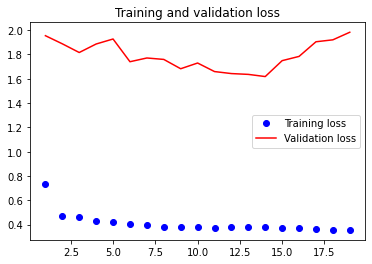

In [ ]:
display_learning_curve(his1)

Analysis : My model is overfitted as the training loss is lower than validation loss.

# Evaluate this model first

In [ ]:

# load the checkpointed model and compute its test MAE
fully_connected_model = keras.models.load_model("temp_fully_connected.keras")

print(f"Validation MAE fully connected with 1 hidden layer: {evaluate_model(timeSeries_val, model=fully_connected_model):.2f}")


Validation MAE fully connected with 1 hidden layer: 0.68


The validation MAE of fully connected with 1 hidden layer is lower than navie baseline model. So, it did better than commonbaseline model.

**Regularize the model with drop out layers and L2 regularization**

In [ ]:

num_layers = 1
num_features= newDF[first_key].shape[-1]
inputs = keras.Input(shape=(sequence_length, num_features))
x = layers.Flatten()(inputs)
for i in range(num_layers):
  x = layers.Dense(16,  kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
  x= layers.ReLU()(x)
  x=layers.Dropout(0.3)(x)


outputs = layers.Dense(1)(x)
regularized_model = keras.Model(inputs, outputs)

#create a learning_rate schedule
lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    alpha=1e-2,
    decay_steps=10000)


opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.98, nesterov=True)
regularized_model.compile(optimizer=opt, loss="mse", metrics=["mae"])


# check point the best model
checkpoint_r= keras.callbacks.ModelCheckpoint("regularize_model.keras",save_best_only=True)

#stop trianing if validation loss does not imrove for 5 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-3, restore_best_weights=True)


h2 = regularized_model.fit(timeSeries_train,
epochs=100,
validation_data=timeSeries_val,
callbacks=[checkpoint_r, early_stopping])



Epoch 1/100
159/159 [==============================] - 10s 58ms/step - loss: 0.7637 - mae: 0.6126 - val_loss: 1.8626 - val_mae: 0.8838
Epoch 2/100
159/159 [==============================] - 9s 59ms/step - loss: 0.5358 - mae: 0.4750 - val_loss: 1.5881 - val_mae: 0.7425
Epoch 3/100
159/159 [==============================] - 10s 60ms/step - loss: 0.5232 - mae: 0.4788 - val_loss: 1.5381 - val_mae: 0.6892
Epoch 4/100
159/159 [==============================] - 9s 57ms/step - loss: 0.4989 - mae: 0.4652 - val_loss: 1.5410 - val_mae: 0.7222
Epoch 5/100
159/159 [==============================] - 9s 58ms/step - loss: 0.4784 - mae: 0.4565 - val_loss: 1.5159 - val_mae: 0.7032
Epoch 6/100
159/159 [==============================] - 9s 59ms/step - loss: 0.4847 - mae: 0.4614 - val_loss: 1.8369 - val_mae: 0.7221
Epoch 7/100
159/159 [==============================] - 9s 58ms/step - loss: 0.4715 - mae: 0.4547 - val_loss: 1.9148 - val_mae: 0.7498
Epoch 8/100
159/159 [==============================] - 9s 59

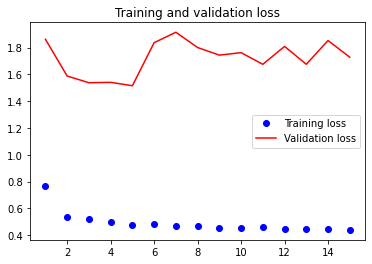

In [ ]:
display_learning_curve(h2)

In [ ]:

# load the checkpointed model and compute its test MAE
regularized_model = keras.models.load_model("regularize_model.keras")

print(f"Validation MAE fully connected with 1 hidden layer with regularization: {evaluate_model(timeSeries_val, model=regularized_model):.2f}")


Validation MAE fully connected with 1 hidden layer with regularization: 0.70


Even though this run, the with regularizer did a bit worst, other times I ran, regularize usually a bit the improved version. 

I also would like to explore what it will be like if we even increase the number of layer of hidden layers to 2.

In [ ]:

num_layers = 2
num_features= newDF[first_key].shape[-1]
inputs = keras.Input(shape=(sequence_length, num_features))
x = layers.Flatten()(inputs)
for i in range(num_layers):
  x = layers.Dense(16,  kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
  x= layers.ReLU()(x)
  x=layers.Dropout(0.3)(x)


outputs = layers.Dense(1)(x)
regularized_model2 = keras.Model(inputs, outputs)

#create a learning_rate schedule
lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    alpha=1e-2,
    decay_steps=10000)


opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.98, nesterov=True)
regularized_model2.compile(optimizer=opt, loss="mse", metrics=["mae"])


# check point the best model
checkpoint_r2= keras.callbacks.ModelCheckpoint("regularize_model2.keras",save_best_only=True)

#stop trianing if validation loss does not imrove for 5 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-3, restore_best_weights=True)


h3 = regularized_model2.fit(timeSeries_train,
epochs=100,
validation_data=timeSeries_val,
callbacks=[checkpoint_r2, early_stopping])



Epoch 1/100
159/159 [==============================] - 10s 59ms/step - loss: 0.7703 - mae: 0.5907 - val_loss: 2.1024 - val_mae: 0.7928
Epoch 2/100
159/159 [==============================] - 9s 59ms/step - loss: 0.5869 - mae: 0.4909 - val_loss: 2.0168 - val_mae: 0.7724
Epoch 3/100
159/159 [==============================] - 10s 60ms/step - loss: 0.5392 - mae: 0.4720 - val_loss: 2.1504 - val_mae: 0.8094
Epoch 4/100
159/159 [==============================] - 10s 60ms/step - loss: 0.5199 - mae: 0.4577 - val_loss: 2.1289 - val_mae: 0.8118
Epoch 5/100
159/159 [==============================] - 9s 59ms/step - loss: 0.4928 - mae: 0.4478 - val_loss: 2.1608 - val_mae: 0.8173
Epoch 6/100
159/159 [==============================] - 9s 58ms/step - loss: 0.4836 - mae: 0.4373 - val_loss: 2.2440 - val_mae: 0.8422
Epoch 7/100
159/159 [==============================] - 9s 58ms/step - loss: 0.4775 - mae: 0.4354 - val_loss: 2.1530 - val_mae: 0.8119
Epoch 8/100
159/159 [==============================] - 9s 5

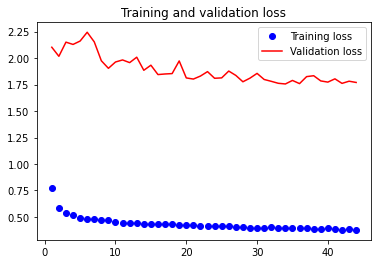

In [ ]:
display_learning_curve(h3)

This model slightly improved the learning curve of 1 hidden layer as the training loss is a bit higher, and val loss is slightly lower.

In [ ]:

# load the checkpointed model and compute its test MAE
regularized_model2 = keras.models.load_model("regularize_model2.keras")

print(f"Validation MAE fully connected with 2 hidden layer with regularization: {evaluate_model(timeSeries_val, model=regularized_model2):.2f}")


Validation MAE fully connected with 2 hidden layer with regularization: 0.72


*Regularization didn't help with overfiting especially when I increased the number of layber of FCN to 2.*

- Tune the hyper-parameters of the model (learning_rate, drop_out_rate, and number of neurons)

In [ ]:
!pip install -q -U keras-tuner
import keras_tuner as kt

     |████████████████████████████████| 133 kB 8.1 MB/s 


In [ ]:

num_layers = 2

def model_builder(hp):
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  hp_dropout_rate = hp.Float('dropout', min_value = 0,max_value = 0.5, step = 0.1)
  hp_learningrate=hp.Float("initial_learning_rate",min_value=1e-4, max_value=1e-2, sampling='log')
 

  #creating and compiling model as usual but replace the constant values for the hyperparameters you want to tune with their placeholders defined above
  num_features= newDF[first_key].shape[-1]
  input = keras.Input(shape=(sequence_length, num_features))
        
  #The first layer ( flatten layer in this case) gets the input image flatten it and pass it to the first hidden layer
  x=layers.Flatten()(input)

        #hidden layers
  for i in range(num_layers):
    x=layers.Dense(hp_units,kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x= layers.ReLU()(x)
    x=layers.Dropout(hp_dropout_rate)(x)

  output=layers.Dense(1)(x)
 #create a model and set its input and output and return it
  model = keras.Model(inputs=input, outputs=output)

  lr_schedule = keras.optimizers.schedules.CosineDecay(
  initial_learning_rate=hp_learningrate,
  decay_steps=10000, alpha=1e-2)

  
  opt = tf.keras.optimizers.SGD(learning_rate=hp_learningrate, momentum=0.98, nesterov=True)
  model.compile(optimizer=opt, loss="mse", metrics=["mae"])

  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_mae',
                     max_epochs=20,
                     factor=3,
                     directory='tuner',
                     project_name='timeSeries')  

In [ ]:
# check point the best model
checkpoint_tunner= keras.callbacks.ModelCheckpoint("temp_tunned_fully_connected.keras",save_best_only=True)

#stop trianing if validation loss does not imrove for 5 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-3, restore_best_weights=True)

In [ ]:
tuner.search(timeSeries_train, epochs=10, validation_data=timeSeries_val, callbacks=[early_stopping])

best_hps=tuner.get_best_hyperparameters()[0]
best_model = tuner.get_best_models(num_models = 1)[0]

print(f"""
The hyperparameter search is complete.

The optimal number of units  is {best_hps.get('units')}. 
The optimal learning rate for the optimizer is {best_hps.get('initial_learning_rate')}.  
The optimal dropout is {best_hps.get('dropout')}.  

""")


Trial 30 Complete [00h 03m 54s]
val_mae: 0.73262619972229

Best val_mae So Far: 0.7226795554161072
Total elapsed time: 00h 42m 38s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete.

The optimal number of units  is 224. 
The optimal learning rate for the optimizer is 0.0006797428221962078.  
The optimal dropout is 0.30000000000000004.  




- Compare the Mean Absolute Error

In [ ]:
# load the checkpointed model and compute its val MAE


print(f"val MAE for best model of fully connected model: {evaluate_model(timeSeries_val, model=best_model):.2f}")
print(f"val MAE for commonsense model: {evaluate_model(timeSeries_val):.2f}")

val MAE for best model of fully connected model: 0.72
val MAE for commonsense model: 0.97


Yes, my best ML model performed much  better than commonsense model.

# A Recurrent Model

- sigle LSTM

In [ ]:
#early stopping and L2

num_features= newDF[first_key].shape[-1]
inputs = keras.Input(shape=(sequence_length, num_features))
x = layers.LSTM(16,  kernel_regularizer=tf.keras.regularizers.l2(0.001))(inputs)
outputs = layers.Dense(1)(x)
lstm_model = keras.Model(inputs, outputs)


#create a learning_rate schedule
lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    alpha=1e-2,
    decay_steps=10000)


opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule, momentum=0.98)

lstm_model.compile(optimizer=opt, loss="mse", metrics=["mae"])

# check point the best model
checkpoint= keras.callbacks.ModelCheckpoint("temp_lstm.keras",save_best_only=True)

#stop trianing if validation loss does not imrove for 5 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-4, restore_best_weights=True)



h_rnn= lstm_model.fit(timeSeries_train,
epochs=50,
validation_data=timeSeries_val,
callbacks=[checkpoint, early_stopping])

Epoch 1/50
159/159 [==============================] - 14s 63ms/step - loss: 0.5280 - mae: 0.4679 - val_loss: 1.8407 - val_mae: 0.7525
Epoch 2/50
159/159 [==============================] - 10s 61ms/step - loss: 0.4091 - mae: 0.4084 - val_loss: 2.5381 - val_mae: 1.0101
Epoch 3/50
159/159 [==============================] - 10s 61ms/step - loss: 0.3874 - mae: 0.3913 - val_loss: 2.3949 - val_mae: 0.9458
Epoch 4/50
159/159 [==============================] - 10s 62ms/step - loss: 0.3876 - mae: 0.3929 - val_loss: 1.9693 - val_mae: 0.8228
Epoch 5/50
159/159 [==============================] - 10s 61ms/step - loss: 0.3769 - mae: 0.3844 - val_loss: 3.0971 - val_mae: 1.1172
Epoch 6/50
159/159 [==============================] - 12s 73ms/step - loss: 0.3811 - mae: 0.3874 - val_loss: 1.8156 - val_mae: 0.7855
Epoch 7/50
159/159 [==============================] - 10s 61ms/step - loss: 0.3823 - mae: 0.3877 - val_loss: 1.7607 - val_mae: 0.7503
Epoch 8/50
159/159 [==============================] - 10s 62ms

# Evalutae the model on the testing set

In [ ]:
lstm_model = keras.models.load_model("temp_lstm.keras")

print(f"test MAE for LSTM model: {evaluate_model(timeSeries_test, model=lstm_model):.2f}")
print(f"test MAE for commonbase model: {evaluate_model(timeSeries_test):.2f}")

test MAE for LSTM model: 0.83
test MAE for commonbase model: 0.95


LSTM model did better on the testing data.

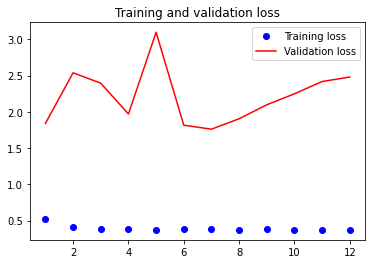

In [ ]:
display_learning_curve(h_rnn)

The model is overfitted.


- Regularlizing model using dropout = 0.3.

>> None Stacking

In [ ]:

inputs = keras.Input(shape=(sequence_length, num_features))
x = layers.LSTM(16, kernel_regularizer=tf.keras.regularizers.l2(0.001),recurrent_dropout=0.3 )(inputs)

outputs = layers.Dense(1)(x)
lstm_model_reg = keras.Model(inputs, outputs)



#create a learning_rate schedule
lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    alpha=1e-2,
    decay_steps=10000)


opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule, momentum=0.98)
lstm_model_reg.compile(optimizer=opt, loss="mse", metrics=["mae"])

# check point the best model
checkpoint2= keras.callbacks.ModelCheckpoint("temp_lstm_reg.keras",save_best_only=True)

#stop trianing if validation loss does not imrove for 5 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-4, restore_best_weights=True)


h_rnn_reg= lstm_model_reg.fit(timeSeries_train,
epochs=50,
validation_data=timeSeries_val,
callbacks=[checkpoint2, early_stopping])



Epoch 1/50
159/159 [==============================] - 53s 319ms/step - loss: 0.4832 - mae: 0.4425 - val_loss: 1.6264 - val_mae: 0.7098
Epoch 2/50
159/159 [==============================] - 51s 319ms/step - loss: 0.4199 - mae: 0.4175 - val_loss: 1.6518 - val_mae: 0.7487
Epoch 3/50
159/159 [==============================] - 50s 316ms/step - loss: 0.3960 - mae: 0.3927 - val_loss: 2.1324 - val_mae: 0.9361
Epoch 4/50
159/159 [==============================] - 50s 317ms/step - loss: 0.3822 - mae: 0.3905 - val_loss: 2.1012 - val_mae: 0.9334
Epoch 5/50
159/159 [==============================] - 51s 319ms/step - loss: 0.3832 - mae: 0.3936 - val_loss: 2.0009 - val_mae: 0.8792
Epoch 6/50
159/159 [==============================] - 50s 317ms/step - loss: 0.3812 - mae: 0.3905 - val_loss: 1.9590 - val_mae: 0.8672


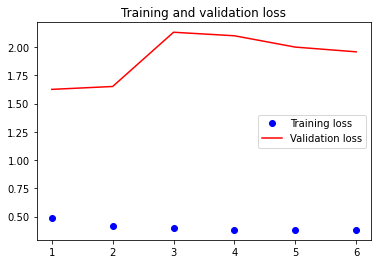

In [ ]:
display_learning_curve(h_rnn_reg)

With dropout, val loss seems to do well that it decreased.

- Add more layers to LSTM.

>> Stacking

In [ ]:

inputs = keras.Input(shape=(sequence_length, num_features))
x = layers.LSTM(16, kernel_regularizer=tf.keras.regularizers.l2(0.001),recurrent_dropout=0.3,return_sequences=True )(inputs)
x = layers.LSTM(16, kernel_regularizer=tf.keras.regularizers.l2(0.001),recurrent_dropout=0.3)(x)
outputs = layers.Dense(1)(x)
lstm_model_reg_stack = keras.Model(inputs, outputs)



#create a learning_rate schedule
lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    alpha=1e-2,
    decay_steps=10000)


opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule, momentum=0.98)
lstm_model_reg_stack.compile(optimizer= opt, loss="mse", metrics=["mae"])
# check point the best model
checkpoint2= keras.callbacks.ModelCheckpoint("temp_stack_lstm_reg.keras",save_best_only=True)

#stop trianing if validation loss does not imrove for 5 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-4, restore_best_weights=True)

h_rnn_reg_stack= lstm_model_reg_stack.fit(timeSeries_train,
epochs=50,
validation_data=timeSeries_val,
callbacks=[checkpoint2, early_stopping])



Epoch 1/50
159/159 [==============================] - 97s 583ms/step - loss: 0.5988 - mae: 0.4903 - val_loss: 1.8397 - val_mae: 0.8126
Epoch 2/50
159/159 [==============================] - 92s 576ms/step - loss: 0.4766 - mae: 0.4317 - val_loss: 1.9249 - val_mae: 0.8290
Epoch 3/50
159/159 [==============================] - 92s 579ms/step - loss: 0.4368 - mae: 0.4140 - val_loss: 1.8567 - val_mae: 0.8201
Epoch 4/50
159/159 [==============================] - 91s 573ms/step - loss: 0.4287 - mae: 0.4056 - val_loss: 1.8194 - val_mae: 0.7885
Epoch 5/50
159/159 [==============================] - 91s 571ms/step - loss: 0.4170 - mae: 0.4103 - val_loss: 1.8896 - val_mae: 0.8211
Epoch 6/50
159/159 [==============================] - 91s 573ms/step - loss: 0.4044 - mae: 0.3998 - val_loss: 2.8338 - val_mae: 1.0754
Epoch 7/50
159/159 [==============================] - 91s 570ms/step - loss: 0.4037 - mae: 0.4007 - val_loss: 1.8635 - val_mae: 0.7946
Epoch 8/50
159/159 [==============================] - 9

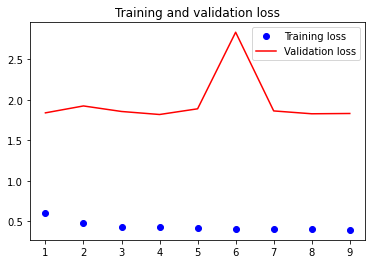

In [ ]:
display_learning_curve(h_rnn_reg_stack)

In [ ]:
lstm_model_reg_stack = keras.models.load_model("temp_stack_lstm_reg.keras")

print(f"test MAE for stacked LSTM model: {evaluate_model(timeSeries_test, model=lstm_model_reg_stack):.2f}")
print(f"test MAE for commonbase model: {evaluate_model(timeSeries_test):.2f}")

test MAE for stacked LSTM model: 0.81
test MAE for commonbase model: 0.95


**Comparing stacked and none stacked LSTM**

In [ ]:
#NONE STACKING
lstm_model_reg= keras.models.load_model("temp_lstm_reg.keras")
print(f"train MAE for LSTM model: {evaluate_model(timeSeries_train, model=lstm_model_reg):.2f}")
print(f"val MAE for LSTM model: {evaluate_model(timeSeries_val, model=lstm_model_reg):.2f}")




train MAE for LSTM model: 0.42
val MAE for LSTM model: 0.71


In [ ]:
#Stack
print(f"train MAE for stacked LSTM model: {evaluate_model(timeSeries_train, model=lstm_model_reg_stack):.2f}")
print(f"val MAE for stacked LSTM model: {evaluate_model(timeSeries_val, model=lstm_model_reg_stack):.2f}")

train MAE for stacked LSTM model: 0.44
val MAE for stacked LSTM model: 0.79


This showed that with stacking, val mae didn't improve over non-stacking.

**** 




Let's try to stack another layer.

In [ ]:

inputs = keras.Input(shape=(sequence_length, num_features))
x = layers.LSTM(16, kernel_regularizer=tf.keras.regularizers.l2(0.001),recurrent_dropout=0.3,return_sequences=True )(inputs)
x = layers.LSTM(16, kernel_regularizer=tf.keras.regularizers.l2(0.001),recurrent_dropout=0.3,return_sequences=True )(x)
x = layers.LSTM(16, kernel_regularizer=tf.keras.regularizers.l2(0.001),recurrent_dropout=0.3)(x)
outputs = layers.Dense(1)(x)
lstm_model_reg_stack2 = keras.Model(inputs, outputs)

# check point the best model
checkpoint3= keras.callbacks.ModelCheckpoint("temp_stack_lstm_reg2.keras",save_best_only=True)

#stop trianing if validation loss does not imrove for 5 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-4, restore_best_weights=True)

#create a learning_rate schedule
lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    alpha=1e-2,
    decay_steps=10000)


opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule, momentum=0.98)
lstm_model_reg_stack2.compile(optimizer=opt, loss="mse", metrics=["mae"])
h_rnn_reg_stack2= lstm_model_reg_stack2.fit(timeSeries_train,
epochs=50,
validation_data=timeSeries_val,
callbacks=[checkpoint3, early_stopping])



Epoch 1/50
159/159 [==============================] - 145s 848ms/step - loss: 0.6208 - mae: 0.4881 - val_loss: 1.9265 - val_mae: 0.8271
Epoch 2/50
159/159 [==============================] - 134s 845ms/step - loss: 0.5185 - mae: 0.4452 - val_loss: 1.8845 - val_mae: 0.8140
Epoch 3/50
159/159 [==============================] - 135s 847ms/step - loss: 0.4870 - mae: 0.4343 - val_loss: 1.9924 - val_mae: 0.8205
Epoch 4/50
159/159 [==============================] - 133s 840ms/step - loss: 0.4445 - mae: 0.4153 - val_loss: 1.9580 - val_mae: 0.8089
Epoch 5/50
159/159 [==============================] - 134s 845ms/step - loss: 0.4366 - mae: 0.4167 - val_loss: 1.8995 - val_mae: 0.7915
Epoch 6/50
159/159 [==============================] - 134s 844ms/step - loss: 0.4429 - mae: 0.4187 - val_loss: 1.7854 - val_mae: 0.7719
Epoch 7/50
159/159 [==============================] - 131s 825ms/step - loss: 0.4284 - mae: 0.4125 - val_loss: 1.9445 - val_mae: 0.8066
Epoch 8/50
159/159 [============================

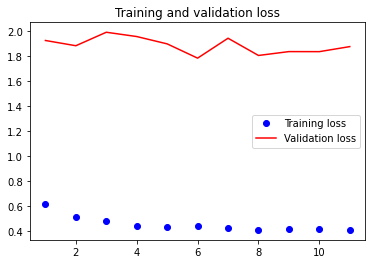

In [ ]:
display_learning_curve(h_rnn_reg_stack2)

In [ ]:
h_rnn_reg_stack2 = keras.models.load_model("temp_stack_lstm_reg2.keras")

print(f"Validation MAE 2 layer stacked lstm: {evaluate_model(timeSeries_val, model=h_rnn_reg_stack2 ):.2f}")


Validation MAE 2 layer stacked lstm: 0.77


We can conclude that adding more layers of LSTM as I added 1, 2 layers didin't improve the performance.

-  Tune the hyper-parameters using hyperband the same hyperparamters we did with fully connected model

In [ ]:

def model_builder2(hp):
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  hp_dropout_rate = hp.Float('dropout', min_value = 0,max_value = 0.5, step = 0.1)
  hp_learningrate=hp.Float("initial_learning_rate",min_value=1e-4, max_value=1e-2, sampling='log')
 
  num_features= newDF[first_key].shape[-1]
  inputs = keras.Input(shape=(sequence_length, num_features))
  x = layers.LSTM(hp_units, kernel_regularizer=tf.keras.regularizers.l2(0.001),recurrent_dropout=hp_dropout_rate )(inputs)

   
  output=layers.Dense(1)(x)
 #create a model and set its input and output and return it
  model = keras.Model(inputs=inputs, outputs=output)

  #create a learning_rate schedule
  lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    alpha=1e-2,
    decay_steps=10000)


  
  opt = tf.keras.optimizers.RMSprop(learning_rate= hp_learningrate, momentum=0.98)
  model.compile(optimizer=opt, loss="mse", metrics=["mae"])

  return model

In [ ]:
tuner2 = kt.Hyperband(model_builder2,
                     objective='val_mae',
                     max_epochs=20,
                     factor=3,
                     directory='tuner',
                     project_name='timeSeries_LSTM')  

In [ ]:
#stop trianing if validation loss does not imrove for 5 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-3, restore_best_weights=True)

In [ ]:
tuner2.search(timeSeries_train, epochs=10, validation_data=timeSeries_val, callbacks=[early_stopping])

best_hps2=tuner2.get_best_hyperparameters()[0]
best_model2 = tuner2.get_best_models(num_models = 1)[0]

print(f"""
The hyperparameter search is complete.

The optimal number of units  is {best_hps2.get('units')}. 
The optimal learning rate for the optimizer is {best_hps2.get('initial_learning_rate')}.  
The optimal dropout is {best_hps2.get('dropout')}.  

""")


Trial 30 Complete [00h 13m 11s]
val_mae: 1.7196943759918213

Best val_mae So Far: 0.6770684719085693
Total elapsed time: 03h 26m 37s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete.

The optimal number of units  is 480. 
The optimal learning rate for the optimizer is 0.0011882296480421079.  
The optimal dropout is 0.30000000000000004.  




- Compare the MAE of tunned model VS baseline model VS fully connected model

In [ ]:
print(f"val MAE for best model of LSTM model : {evaluate_model(timeSeries_val, model=best_model2):.2f}")
print(f"val MAE for best model of fully connected model  : {evaluate_model(timeSeries_val, model=best_model):.2f}")
print(f"val MAE for commonsense model: {evaluate_model(timeSeries_val):.2f}")

val MAE for best model of LSTM model : 0.68
val MAE for best model of fully connected model  : 0.72
val MAE for commonsense model: 0.97


**The best model of LSTM model performed the best among these model on this dataset.**

# A 1D Convolutional Model

In [ ]:
inputs = keras.Input(shape=(sequence_length, num_features))
# a 1D convolutional layer with 8 filters and a kernel/window of size 14
x = layers.Conv1D(8,14, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)

# a 1D convolutional layer with 8 filters and a kernel of size 14
x = layers.Conv1D(8, 14, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)


# a golobal average pooling layer that takes the global average along the temporal dimension
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
conv1D_model = keras.Model(inputs, outputs)

conv1D_model.summary()



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 7)]           0         
                                                                 
 conv1d (Conv1D)             (None, 47, 8)             792       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 23, 8)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 8)             904       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 8)             0         
 1D)                                                             
                                                                 
 global_average_pooling1d (G  (None, 8)                0   

In [ ]:
lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    alpha=1e-2,
    decay_steps=10000)


opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule, momentum=0.98)
conv1D_model.compile(optimizer=opt, loss="mse", metrics=["mae"])
# check point the best model
checkpoint= keras.callbacks.ModelCheckpoint("temp_conv1d.keras",save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-3, restore_best_weights=True)

h_1D = conv1D_model.fit(timeSeries_train,
epochs=50,
validation_data=timeSeries_val,
callbacks=[checkpoint, early_stopping])

Epoch 1/50
159/159 [==============================] - 17s 64ms/step - loss: 1.0302 - mae: 0.7590 - val_loss: 3.0806 - val_mae: 1.1090
Epoch 2/50
159/159 [==============================] - 10s 64ms/step - loss: 1.0151 - mae: 0.7567 - val_loss: 3.1079 - val_mae: 1.1128
Epoch 3/50
159/159 [==============================] - 10s 63ms/step - loss: 1.0158 - mae: 0.7577 - val_loss: 3.1175 - val_mae: 1.1142
Epoch 4/50
159/159 [==============================] - 10s 64ms/step - loss: 1.0158 - mae: 0.7577 - val_loss: 3.1205 - val_mae: 1.1146
Epoch 5/50
159/159 [==============================] - 10s 63ms/step - loss: 1.0157 - mae: 0.7577 - val_loss: 3.1224 - val_mae: 1.1149
Epoch 6/50
159/159 [==============================] - 10s 63ms/step - loss: 1.0157 - mae: 0.7576 - val_loss: 3.1245 - val_mae: 1.1152
Epoch 7/50
159/159 [==============================] - 10s 63ms/step - loss: 1.0156 - mae: 0.7576 - val_loss: 3.1270 - val_mae: 1.1155
Epoch 8/50
159/159 [==============================] - 10s 64ms

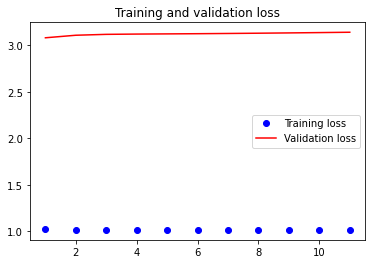

In [ ]:
display_learning_curve(h_1D)

In [ ]:
print(f"val MAE for best model of 1D conv : {evaluate_model(timeSeries_val, model=conv1D_model):.2f}")
print(f"val MAE for best model of LSTM model : {evaluate_model(timeSeries_val, model=best_model2):.2f}")
print(f"val MAE for best model of fully connected model  : {evaluate_model(timeSeries_val, model=best_model):.2f}")
print(f"val MAE for commonsense model: {evaluate_model(timeSeries_val):.2f}")

val MAE for best model of 1D conv : 1.11
val MAE for best model of LSTM model : 0.68
val MAE for best model of fully connected model  : 0.72
val MAE for commonsense model: 0.97


My run is best on LSTM becasue it has lowest val MAE.

In [ ]:
print(f"test MAE for best model of 1D conv : {evaluate_model(timeSeries_test, model=conv1D_model):.2f}")
print(f"test MAE for best model of LSTM model : {evaluate_model(timeSeries_test, model=best_model2):.2f}")
print(f"test MAE for best model of fully connected model  : {evaluate_model(timeSeries_test, model=best_model):.2f}")
print(f"test MAE for commonsense model: {evaluate_model(timeSeries_test):.2f}")

test MAE for best model of 1D conv : 0.85
test MAE for best model of LSTM model : 0.69
test MAE for best model of fully connected model  : 0.66
test MAE for commonsense model: 0.95


On the test dataset, fully connected model model did best followed by LSTM.